In [1]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

# 英文停用词
stop_words = set(stopwords.words('english'))


context_length = "0k"
file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
 
# file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal/Meta-Llama-3.1-8B-Instruct/1900/ce"
# context_length = "2k"
# file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/{int(context_length[:-1])*1000-100}/ce"
file_dir = f"/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_embedding/Meta-Llama-3.1-8B-Instruct/0/label"
prefix = "3-hop*"
all_files = auto_read_dir(file_dir, file_prefix=prefix)
i = 0
all_files = [os.path.join(file_dir, x) for x in all_files]
len(all_files)

ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2025-01-19 22:04:59


2025-01-19 18:04:59.790 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '3-hop*' and suffix '': 5


5

In [2]:
single_data = auto_read_data(all_files[0])
single_data

begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max12k_sample200_embedding/Meta-Llama-3.1-8B-Instruct/0/label/3-hop_sid-0_pid-1_0-1-4-7.pkl | file size: 821.0 B | file type: pkl


{'embedding': {'score': [2.129671963778409,
   2.055828387920673,
   2.8418412642045454,
   1.9562660618832237],
  'topk_indices': array([ 27, 158, 204,   8,  50,  67,  42, 201,  31,  15,  19, 129,   0,
          23,  57,  20,  64,  16,  61,  24]),
  'topk_tokens': ['user',
   ' moved',
   ' directly',
   ' Date',
   ' journey',
   ' the',
   ' bedroom',
   ' return',
   ' journey',
   'Today',
   '26',
   ' first',
   '<|begin_of_text|>',
   '4',
   ' journey',
   ' Jul',
   ' journey',
   ' Date',
   ' bathroom',
   '\n\n'],
  'evidence_proportions': [2.8639322916666665,
   2.5519205729166665,
   1.7991943359375,
   1.1934814453125]},
 'pred_res': 'The office.<|eot_id|>',
 'score': 100}

  0%|          | 0/672 [00:00<?, ?it/s]

begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_2-3-5-6-8.pkl | file size: 11.46 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes_0-1-7-8.pkl | file size: 10.82 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_0-2-3-5-8.pkl | file size: 11.42 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_2-4-5-7-9.pkl | file size: 11.41 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes_0-3-5-9.pkl | file size: 10.88 KB | file type: pkl

100%|██████████| 672/672 [00:00<00:00, 6937.92it/s]


begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_0-1-5-6-8.pkl | file size: 11.4 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-no_1-3-5-8.pkl | file size: 10.82 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_0-1-3-6-8.pkl | file size: 11.43 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-no_1-3-6-9.pkl | file size: 10.71 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes_0-1-2-6.pkl | file size: 10.76 KB | file type: pkl
begin to 

100%|██████████| 672/672 [00:00<00:00, 6759.04it/s]


begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_2-3-5-6-8.pkl | file size: 11.46 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes_0-1-7-8.pkl | file size: 10.82 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_0-2-3-5-8.pkl | file size: 11.42 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes-test_2-4-5-7-9.pkl | file size: 11.41 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900/ce/4-hop-yes_0-3-5-9.pkl | file size: 10.88 KB | file type: pkl

/tmp/ipykernel_95583/920660194.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')


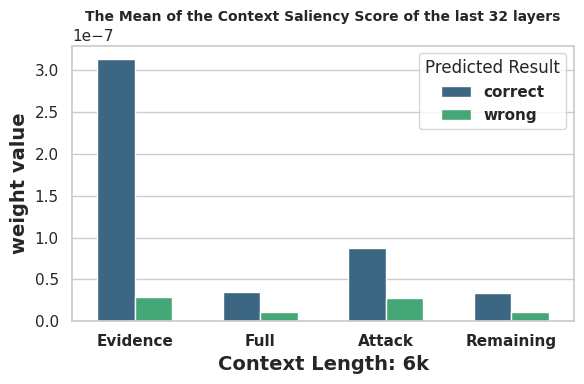

In [209]:
final_scores=[]


for score in [100,0]:
    all_predictions = []
    labels = []

    all_layer_scores = [0, 0, 0, 0]
    sample_numbers = 0
    for file in tqdm(all_files):
        settings = os.path.basename(file).split("_")
        hop, depth = settings[0], settings[1]
        label = hop.split("-")[-1].lower()
        content = auto_read_data(file)
        if content['score'] != score:continue
        sample_numbers += 1
        if content['score'] == 0:
            all_predictions.append(0)
            
        else:
            all_predictions.append(1)
                    
        # print(content['pred_res'], content['score'])
        # print(content[0])
        # break
        # 提取数据
        layer_scores = []
        all_layer_nums = 0
        temp_scores = [0,0,0,0]
        for layer_idx, layer in content.items():
            if isinstance(layer, dict):
                all_layer_nums +=1
                for i, s in enumerate(layer['score']):
                    temp_scores[i] += s
        # print("layers:",all_layer_nums)
        for i in range(len(all_layer_scores)):
            all_layer_scores[i]+=(temp_scores[i]/all_layer_nums)

    
    for i in range(len(all_layer_scores)):
        all_layer_scores[i]/= sample_numbers
    print(all_layer_scores,sample_numbers)
    final_scores.append(tuple(all_layer_scores))



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.patches import FancyBboxPatch
# 示例数据
data = pd.DataFrame({
    'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining'],
    'correct': final_scores[0],
    'wrong': final_scores[1],
})



# 将数据转换为长格式
data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

# 设置Seaborn主题
sns.set_theme(style="whitegrid")

# 创建分组柱状图
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted, palette="viridis", width = 0.6)

# # plt.ylim([0.04,0.06])
# for patch in bar_plot.patches:
#     # 获取矩形的位置和尺寸
    
#     # 隐藏原始矩形柱
#     x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
    
#     # 创建圆角矩形
#     rounded_rect = FancyBboxPatch(
#         (x, y), width, height, 
#         boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
#         edgecolor="blue", 
#         facecolor=patch.get_facecolor(),
#         linewidth=0
#     )
    
#     # 添加到当前的绘图区
#     bar_plot.add_patch(rounded_rect)

# 添加标题和标签
plt.title(f'The Mean of the Context Saliency Score of the last {all_layer_nums} layers', fontsize=10, fontweight='bold')
plt.xlabel(f'Context Length: {context_length}', fontsize=14, fontweight = 'bold')
plt.ylabel('weight value', fontsize=14, fontweight = 'bold')

# 调整x轴标签的旋转角度

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

# 添加数值标签
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f').rstrip('0').rstrip('.').lstrip("0"), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# 显示图例
# plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title = 'Predicted Result', prop={'weight': 'bold'})
# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [81]:
final_scores

[(0.002991754600419336,
  0.0002761179473691428,
  0.0015960570131794787,
  0.0002497999509526578),
 (0.003053194125712302,
  0.00034440238236519186,
  0.001342143309264143,
  0.00032017777572222267)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.patches import FancyBboxPatch
# 示例数据
data = pd.DataFrame({
    'Context Type': ['Evidence', 'Full', 'Attack', 'Remaining'],
    'correct': [8.5, 75.7, 67.4, 89.0],
    'wrong': [82.3, 70.1, 60.5, 85.2],
})



# 将数据转换为长格式
data_melted = data.melt(id_vars='Context Type', var_name='Predicted Result', value_name='Mean Weight')

# 设置Seaborn主题
sns.set_theme(style="whitegrid")

# 创建分组柱状图
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Context Type', y='Mean Weight', hue='Predicted Result', data=data_melted, palette="viridis", width = 0.6)


for patch in bar_plot.patches:
    # 获取矩形的位置和尺寸
    
    # 隐藏原始矩形柱
    x, y, width, height = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()
    
    # 创建圆角矩形
    rounded_rect = FancyBboxPatch(
        (x, y), width, height, 
        boxstyle="round,pad=0.05,rounding_size=0.05",  # 调整 pad 和 rounding_size
        edgecolor="blue", 
        facecolor=patch.get_facecolor(),
        linewidth=0
    )
    
    # 添加到当前的绘图区
    bar_plot.add_patch(rounded_rect)

# 添加标题和标签
plt.title('The Mean of the Context Saliency Score of the last 8 layers', fontsize=16, fontweight='bold')
plt.xlabel('Context Type', fontsize=14, fontweight = 'bold')
plt.ylabel('weight value', fontsize=14, fontweight = 'bold')

# 调整x轴标签的旋转角度

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontweight='bold', horizontalalignment='center')

# 添加数值标签
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f').rstrip('0').rstrip('.').lstrip("0"), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# 显示图例
# plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title = 'Predicted Result', prop={'weight': 'bold'})
# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [67]:
print(final_scores[0])
print(final_scores[1])

(0.0015710015539769772, 0.00011425844826160717, 0.0008094475819514348, 0.00010951014542204965)
(0.0036861665674772152, 0.00011725764698488433, 0.00218664931786888, 0.00010483707425566389)


100%|██████████| 210/210 [00:00<00:00, 13405.02it/s]

begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_1-4-6-9.pkl | file size: 3.06 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_1-2-3-5.pkl | file size: 3.12 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_4-5-7-9.pkl | file size: 3.16 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_0-1-4-6.pkl | file size: 3.11 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/11900/label/3-hop_2-4-5

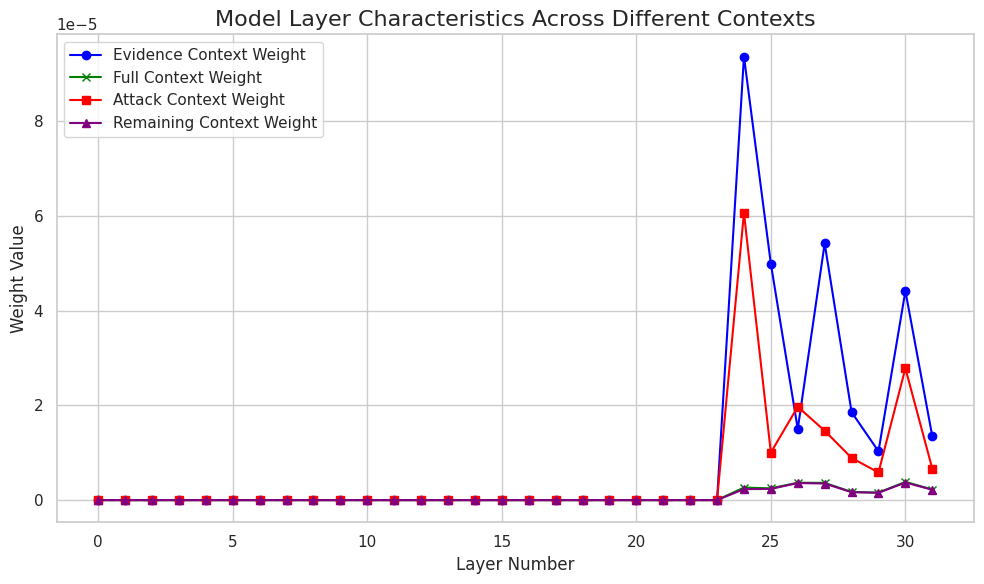

In [38]:
all_predictions = []
labels = []

layers = np.array(list(range(32)))
all_layer_scores = [[0, 0, 0, 0, 0] for i in range(len(layers))]

for file in tqdm(all_files):
    settings = os.path.basename(file).split("_")
    hop, depth = settings[0], settings[1]
    label = hop.split("-")[-1].lower()
    content = auto_read_data(file)
    if content['score'] == 0:
        continue
        all_predictions.append(0)
        
    else:
        # continue
        all_predictions.append(1)
        
    # print(content['pred_res'], content['score'])
    # print(content[0])
    # break
    # 提取数据
    layer_scores = []
    for layer_idx, layer in content.items():
        if isinstance(layer, dict):
            for i, s in enumerate(layer['score']):
                all_layer_scores[layer_idx][i] += s


for layer_idx, scores in enumerate(all_layer_scores):
    for j, score in enumerate(scores):
        scores[j] = scores[j] / len(all_files)


all_layer_scores = np.array(all_layer_scores)
# 为每个层的四个数值分别定义一个系列
evidence_weight = all_layer_scores[:, 0]
full_context_weight = all_layer_scores[:, 1]
attack_context_weight = all_layer_scores[:, 2]
remaining_context_weight = all_layer_scores[:, 3]

print(f"accuracy: {np.mean(all_predictions)}")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每层的四个权重
plt.plot(layers, evidence_weight, label='Evidence Context Weight', color='blue', marker='o')
plt.plot(layers, full_context_weight, label='Full Context Weight', color='green', marker='x')
plt.plot(layers, attack_context_weight, label='Attack Context Weight', color='red', marker='s')
plt.plot(layers, remaining_context_weight, label='Remaining Context Weight', color='purple', marker='^')

plt.title('Model Layer Characteristics Across Different Contexts', fontsize=16)
plt.xlabel('Layer Number', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()

# 显示图形
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
def count_tokens(content):
    s_lst, d_lst = [], []
    for k, v in content.items():
        if isinstance(k, int):
            if k < 16:
                s_lst.extend(v['topk_tokens'])
            else:
                d_lst.extend(v['topk_tokens'])
            s_lst = list(set(s_lst))
            d_lst = list(set(d_lst))
            # s_lst = [word for word in s_lst if word.lower() not in stop_words and word.isalpha()]
            # d_lst = [word for word in d_lst if word.lower() not in stop_words and word.isalpha()]
    return s_lst, d_lst

100%|██████████| 210/210 [00:00<00:00, 14092.41it/s]

begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_1-4-6-9.pkl | file size: 3.19 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_1-2-3-5.pkl | file size: 3.13 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_4-5-7-9.pkl | file size: 3.17 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_0-1-4-6.pkl | file size: 3.14 KB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow_normal_max16k/Meta-Llama-3.1-8B-Instruct/7900/label/3-hop_2-4-5-7.pk

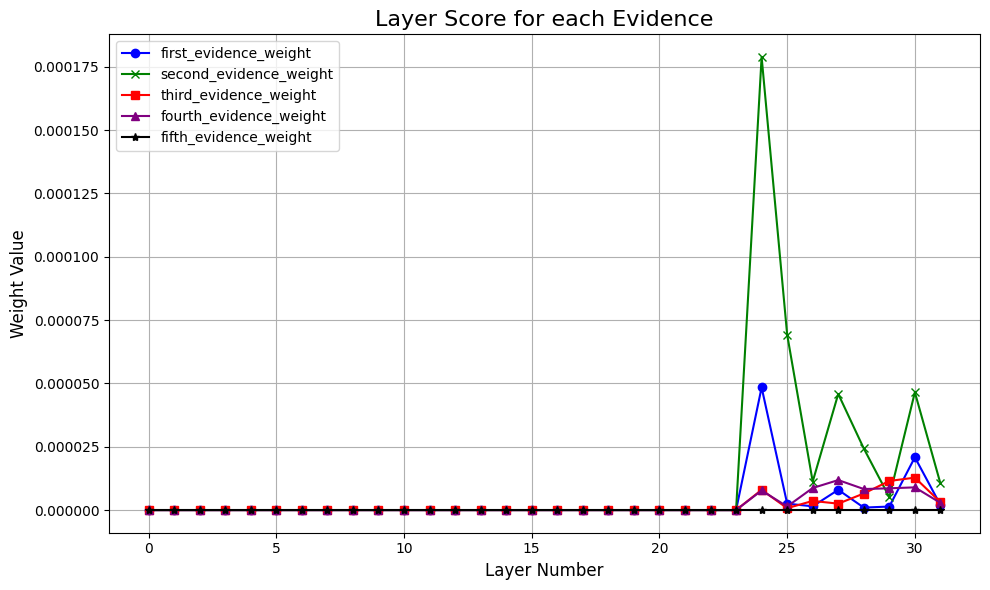

accuracy: 1.0


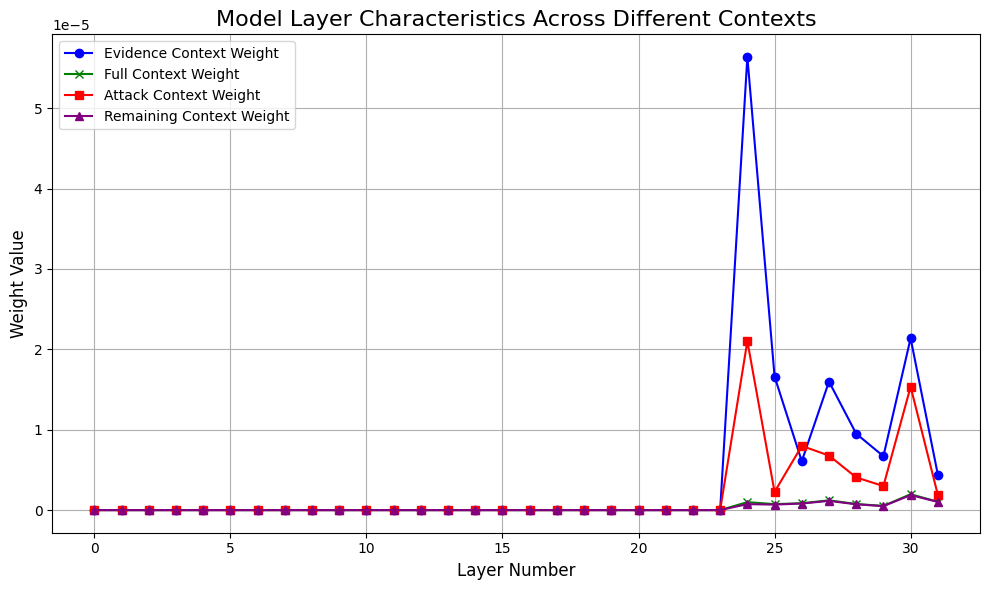

In [9]:
all_predictions = []
labels = []

layers = np.array(list(range(32)))
all_layer_scores = [[0, 0, 0, 0, 0] for i in range(len(layers))]
each_evidence_weight = [[0, 0, 0, 0, 0] for i in range(len(layers))]

for file in tqdm(all_files):
    settings = os.path.basename(file).split("_")
    hop, depth = settings[0], settings[1]
    label = hop.split("-")[-1].lower()
    content = auto_read_data(file)
    if content['score'] == 0:
        continue
        all_predictions.append(0)
        
    else:
        # continue
        all_predictions.append(1)
        
    # print(content['pred_res'], content['score'])
    # print(content[0])
    # break
    # 提取数据
    layer_scores = []
    for layer_idx, layer in content.items():
        if isinstance(layer, dict):
            for i, s in enumerate(layer['score']):
                all_layer_scores[layer_idx][i] += s
            for i, s in enumerate(layer['evidence_proportions']):
                each_evidence_weight[layer_idx][i] += s

for layer_idx, scores in enumerate(all_layer_scores):
    for j, score in enumerate(scores):
        scores[j] = scores[j] / len(all_files)

for layer_idx, scores in enumerate(each_evidence_weight):
    for j, score in enumerate(scores):
        scores[j] = scores[j] / len(all_files)

each_evidence_weight = np.array(each_evidence_weight)
first_evidence_weight = each_evidence_weight[:, 0]
second_evidence_weight = each_evidence_weight[:, 1]
third_evidence_weight = each_evidence_weight[:, 2]
fourth_evidence_weight = each_evidence_weight[:, 3]
fifth_evidence_weight = each_evidence_weight[:, 4]

plt.figure(figsize=(10, 6))

# 绘制每层的四个权重
plt.plot(layers, first_evidence_weight, label='first_evidence_weight', color='blue', marker='o')
plt.plot(layers, second_evidence_weight, label='second_evidence_weight', color='green', marker='x')
plt.plot(layers, third_evidence_weight, label='third_evidence_weight', color='red', marker='s')
plt.plot(layers, fourth_evidence_weight, label='fourth_evidence_weight', color='purple', marker='^')
plt.plot(layers, fifth_evidence_weight, label='fifth_evidence_weight', color='black', marker='*')

plt.title('Layer Score for each Evidence', fontsize=16)
plt.xlabel('Layer Number', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()

# 显示图形
plt.grid(True)
plt.tight_layout()
plt.show()

all_layer_scores = np.array(all_layer_scores)
# 为每个层的四个数值分别定义一个系列
evidence_weight = all_layer_scores[:, 0]
full_context_weight = all_layer_scores[:, 1]
attack_context_weight = all_layer_scores[:, 2]
remaining_context_weight = all_layer_scores[:, 3]

print(f"accuracy: {np.mean(all_predictions)}")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每层的四个权重
plt.plot(layers, evidence_weight, label='Evidence Context Weight', color='blue', marker='o')
plt.plot(layers, full_context_weight, label='Full Context Weight', color='green', marker='x')
plt.plot(layers, attack_context_weight, label='Attack Context Weight', color='red', marker='s')
plt.plot(layers, remaining_context_weight, label='Remaining Context Weight', color='purple', marker='^')

plt.title('Model Layer Characteristics Across Different Contexts', fontsize=16)
plt.xlabel('Layer Number', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()

# 显示图形
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dir_path = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/Meta-Llama-3.1-8B-Instruct/5900"
auto_mkdir(dir_path)
succ_cache_lst, fail_cache_lst = [], []
succ_idx, fail_idx = 0, 0
f_shallow_layer_topk_tokens, f_deep_layer_topk_tokens = [], []
s_shallow_layer_topk_tokens, s_deep_layer_topk_tokens = [], []

for file in tqdm(all_files):
    settings = os.path.basename(file).split("_")
    hop, depth = settings[0], settings[1]
    label = hop.split("-")[-1].lower()
    content = auto_read_data(file)

    if label in content["pred_res"].lower():
        succ_cache_lst.append(content)
        # save_path = os.path.join(dir_path, f"correct_{hop}_{depth}.png")
        # s_lst, d_lst = count_tokens(content)
        # s_shallow_layer_topk_tokens.extend(s_lst)
        # s_deep_layer_topk_tokens.extend(d_lst)
        # s_shallow_layer_topk_tokens = list(set(s_shallow_layer_topk_tokens))
        # s_deep_layer_topk_tokens = list(set(s_deep_layer_topk_tokens))
    else:
        fail_cache_lst.append(content)
        # save_path = os.path.join(dir_path, f"wrong_{hop}_{depth}.png")
        # f_s_lst, f_d_lst = count_tokens(content)
        # f_shallow_layer_topk_tokens.extend(f_s_lst)
        # f_deep_layer_topk_tokens.extend(f_d_lst)
        # f_shallow_layer_topk_tokens = list(set(f_shallow_layer_topk_tokens))
        # f_deep_layer_topk_tokens = list(set(f_deep_layer_topk_tokens))
    if len(succ_cache_lst) == 25:
        plot_layer_data_multiple(succ_cache_lst, os.path.join(dir_path, f"correct_{hop}_{succ_idx}.png"))
        succ_cache_lst = []
        succ_idx += 1
    if len(fail_cache_lst) == 25:
        plot_layer_data_multiple(fail_cache_lst, os.path.join(dir_path, f"wrong_{hop}_{fail_idx}.png"))
        fail_cache_lst = []
        fail_idx += 1
    
    if succ_idx > 0 and fail_idx > 0:
        break
    # plot_layer_data(content, save_path, settings)

In [ ]:
pprint(s_shallow_layer_topk_tokens)
pprint(s_deep_layer_topk_tokens)

In [ ]:
pprint(f_shallow_layer_topk_tokens)
pprint(f_deep_layer_topk_tokens)

1. 首先按照是否回答正确进行划分

In [ ]:
print(os.path.basename(all_files[0]))
instance = auto_read_data(all_files[0])

print(instance.keys())
topk_tokens = instance[0]['topk_tokens']  # 0 is the layer index
print(topk_tokens)


In [ ]:
instance

In [ ]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np

# 数据：每层的四个权重数值
layer_data = {
    0: [4.959665238857269e-06, 3.241457776316934e-05, 1.915307207541032e-05, 3.2536576766406514e-05],
    1: [6.113294512033463e-06, 3.588264777170998e-05, 1.875220826177886e-05, 3.602615563138125e-05],
    2: [3.3918768167495728e-06, 3.954556222308137e-05, 1.3849161791078972e-05, 3.973980739152632e-05],
    3: [4.411069676280022e-06, 5.2358093491322196e-05, 8.825382048433477e-06, 5.265427548364616e-05],
    4: [1.409146934747696e-05, 5.386575933844638e-05, 3.642363078666456e-05, 5.403527912603641e-05],
    5: [3.511123359203339e-05, 5.6201644940101574e-05, 3.5292892293496564e-05, 5.633910748514353e-05],
    6: [1.1113425716757775e-05, 7.276903453996061e-05, 2.8178434700803887e-05, 7.310343142066736e-05],
    7: [5.842046812176705e-06, 0.0001060344519507986, 4.455788681904475e-05, 0.0001065330393336028],
    8: [1.1762231588363648e-05, 0.0001127064162164015, 5.673789278124318e-05, 0.00011318438913503663],
    9: [2.7908291667699813e-05, 0.00013008105668458142, 4.593079740350897e-05, 0.00013067705246309438],
    10: [3.418363630771637e-05, 0.0001264135955578132, 5.119948676138213e-05, 0.00012694854421944576],
    11: [1.703500747680664e-05, 0.00011598208717596412, 0.00018443663914998373, 0.00011594746073912442],
    12: [8.40499997138977e-06, 0.00017115683509330904, 6.23587067380096e-05, 0.00017200319697982774],
    13: [0.0006855845451354981, 0.00032301160542711025, 0.0008409402587197044, 0.0003200018249680569],
    14: [0.00020253956317901612, 0.0003778427242573789, 0.0010134717731764822, 0.0003756827718102024],
    15: [6.217481568455696e-05, 0.00031942024437131556, 0.00043356729050477344, 0.0003195906271669796],
    16: [0.013655662536621094, 0.0003536513946724383, 0.001258882609280673, 0.0003170647412450094],
    17: [0.0028010547161102296, 0.00025052682229714346, 0.0014491054144772616, 0.00023932953601892812],
    18: [0.005669236183166504, 0.00029643327858037727, 0.0007366122621478456, 0.0002813514333096739],
    19: [0.0010981798171997071, 0.0001875015840294935, 0.001387981077035268, 0.0001803515607935149],
    20: [0.007794710993766785, 0.0002826679076511171, 0.0023177458029804807, 0.0002557887740868018],
    21: [0.0017806708812713623, 0.00020140549310989484, 0.001226557023597486, 0.0001933175469836189],
    22: [0.001896064169704914, 0.00017294463764580063, 0.0008285483627608328, 0.00016600876801548678],
    23: [0.0013591922819614411, 0.00015825946183714815, 0.0010787226033933234, 0.0001515341972385033],
    24: [0.0015029147267341613, 0.0002128314567774904, 0.001215286637571725, 0.00020555120376496033],
    25: [0.011409810930490493, 0.0002014303863407309, 0.0012002720031887293, 0.0001696389194466929],
    26: [0.0020347237586975098, 0.00016976514241572694, 0.0004434507114417625, 0.00016403680461855895],
    27: [0.002594304084777832, 0.00025047442936777206, 0.0014475617896426809, 0.00023979435073309436],
    28: [0.0008534610271453858, 0.00015710730061251676, 0.0029951467206983857, 0.00014380581997533933],
    29: [0.00024196654558181763, 0.0001313316633156309, 0.0006413843595620358, 0.00012897700992524328],
    30: [0.004878909885883331, 0.00029894708488866395, 0.0019776151713096733, 0.0002807725914574342],
    31: [0.0009814728051424026, 0.0001716352537038241, 0.0005350086386456634, 0.00016815008150651299],
}

